In [216]:
import os
import csv

from convexify import MoosasConvexify
from graphIO import read_geo, write_geo
import sys


input = "E:/DATA/Moosasbuildingdatasets/new_geo"
output = "E:/DATA/Moosasbuildingdatasets/"
csv_output_path = os.path.join(output, "geo_fev_summary_new.csv")

def get_output_paths(modelname):
    return {
        "output_geo_path": os.path.join(output, "geo", f"{modelname}.geo"),
        "output_json_path": os.path.join(output, "graph", f"{modelname}"),
    }

def convex_temp(input_geo_path, output_geo_path):
    cat, idd, normal, faces, holes = read_geo(input_geo_path)
    #convex_cat, convex_idd, convex_normal, convex_faces, divided_lines = MoosasConvexify.convexify_faces(cat, idd, normal, faces, holes)
    #write_geo(output_geo_path, convex_cat, convex_idd, convex_normal, convex_faces)
    F, E, V = MoosasConvexify.calculate(faces)
    print(f"Number of faces: {F}, Number of edges: {E}, Number of vertices: {V}, Euler number: {V - E + F}")
    return F, E, V

def save_fev_to_csv(data, csv_path):
    with open(csv_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["model_name", "F", "E", "V"])
        writer.writerows(data)

def process_file(input_geo_path, modelname, fev_data):
    paths = get_output_paths(modelname)

    
    print(f"Processing file: {input_geo_path}, basename: {modelname}")
    F, E, V = convex_temp(input_geo_path, paths["output_geo_path"])
    fev_data.append([modelname, F, E, V])

def process_geo_files(input_dir, csv_path):
    fev_data = []
    for dirpath, dirnames, filenames in os.walk(input_dir):
        for filename in filenames:
            if filename.endswith('.geo'):
                
                input_geo_path = os.path.join(dirpath, filename).replace('\\', '/')
                relative_path = os.path.relpath(input_geo_path, input_dir)
                basename = os.path.splitext(relative_path)[0].replace('\\', '_')
                process_file(input_geo_path, basename, fev_data)
    save_fev_to_csv(fev_data, csv_path)
    print(f"CSV file saved at {csv_path}")

# 执行处理
process_geo_files(input, csv_output_path)


Processing file: E:/DATA/Moosasbuildingdatasets/new_geo/101_03801_03801-01.geo, basename: 101_03801_03801-01
Number of faces: 408, Number of edges: 1304, Number of vertices: 1121, Euler number: 225
Processing file: E:/DATA/Moosasbuildingdatasets/new_geo/101_03804_03804-01.geo, basename: 101_03804_03804-01
Number of faces: 426, Number of edges: 1227, Number of vertices: 967, Euler number: 166
Processing file: E:/DATA/Moosasbuildingdatasets/new_geo/101_03805_03805-01.geo, basename: 101_03805_03805-01
Number of faces: 339, Number of edges: 1134, Number of vertices: 1007, Euler number: 212
Processing file: E:/DATA/Moosasbuildingdatasets/new_geo/101_03806_03806-01.geo, basename: 101_03806_03806-01
Number of faces: 299, Number of edges: 730, Number of vertices: 451, Euler number: 20
Processing file: E:/DATA/Moosasbuildingdatasets/new_geo/101_03807_03807-01.geo, basename: 101_03807_03807-01
Number of faces: 338, Number of edges: 1054, Number of vertices: 888, Euler number: 172
Processing file

In [ ]:
import os

from convexify import MoosasConvexify
from graph import MoosasGraph
from graphIO import read_geo, write_geo, read_xml, graph_to_json
import sys

main_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
if main_dir not in sys.path:
    sys.path.append(main_dir)

import moosas.python.Lib.MoosasPy as Moosas

#main
user_profile = os.environ['USERPROFILE']

input = "E:/DATA/Moosasbuildingdatasets/_cleaned"
output = "E:/DATA/Moosasbuildingdatasets/"
figure_path = "E:/DATA/Moosasbuildingdatasets/figure/"


"""
input_geo_path = rf"{user_profile}/AppData/Roaming/SketchUp/SketchUp 2022/SketchUp/Plugins/pkpm_moosas/data/geometry/selection0.geo"   

input_xml_path = rf"{user_profile}/AppData/Roaming/SketchUp/SketchUp 2022/SketchUp/Plugins/pkpm_moosas/data/geometry/selection0.xml" 

output_geo_path = "BuildingConvex/data/selection0_convex.geo"
output_xml_path = "BuildingConvex/data/selection0_convex.xml"
output_json_path = "BuildingConvex/data/adjson"

new_geo_path = "BuildingConvex/data/selection0_new.geo"
new_xml_path = "BuildingConvex/data/selection0_new.xml"
"""

def get_output_paths(modelname):
    return {
        "output_geo_path": os.path.join(output, "geo", f"{modelname}.geo"),
        "output_json_path": os.path.join(output, "graph", f"{modelname}"),
        "new_xml_path": os.path.join(output, "new_xml", f"{modelname}.xml"),
        "new_geo_path": os.path.join(output, "new_geo", f"{modelname}.geo"),
        "figure_path": os.path.join(output, "figure", f"convex\{modelname}.png"),
        "figure0_path": os.path.join(output, "figure", f"original\{modelname}.png"),
    }

def convex_temp(input_geo_path, output_geo_path):
    cat, idd, normal, faces, holes = read_geo(input_geo_path)
    MoosasConvexify.plot_faces(faces, file_path=figure_path)
    convex_cat, convex_idd, convex_normal, convex_faces, divided_lines = MoosasConvexify.convexify_faces(cat, idd, normal, faces, holes)
    write_geo(output_geo_path, convex_cat, convex_idd, convex_normal, convex_faces)
    MoosasConvexify.plot_faces(convex_faces, divided_lines, file_path=figure_path)
    F, E, V = MoosasConvexify.calculate(convex_faces)
    print(f"Number of faces: {F}, Number of edges: {E}, Number of vertices: {V}, Euler number: {V - E + F}")

def graph_temp(new_geo_path, new_xml_path, output_json_path):
    graph = MoosasGraph()
    graph.graph_representation(new_geo_path, new_xml_path) 
    #graph.draw_graph_3d() 
    graph_to_json(graph, output_json_path)

def process_file(input_geo_path, modelname):
    paths = get_output_paths(modelname)
    if os.path.exists(paths["output_json_path"]):
        print(f"--Skip-- | {modelname}")
        return
    
    print(f"Processing file: {input_geo_path}, basename: {modelname}")
    
    """
    try:
        convex_temp(input_geo_path, paths["output_geo_path"])
        Moosas.transform(paths["output_geo_path"], paths["new_xml_path"], paths["new_geo_path"], divided_zones=False, standardize=True)
        graph_temp(paths["new_geo_path"], paths["new_xml_path"], paths["output_json_path"])
    except ValueError as e:
        print(f"ValueError: {e} - Modelname: {modelname}")
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e} - Modelname: {modelname}")
    except Exception as e:
        print(f"Unexpected error: {e} - Modelname: {modelname}")
    
    """
    convex_temp(input_geo_path, paths["output_geo_path"])
    #Moosas.transform(paths["output_geo_path"], paths["new_xml_path"], paths["new_geo_path"], divided_zones=False, stdout=None, standardize=True)
    #graph_temp(paths["new_geo_path"], paths["new_xml_path"], paths["output_json_path"])
     
    
    
# 遍历文件夹，处理所有 .geo 文件
def process_geo_files(input_dir):
    for dirpath, dirnames, filenames in os.walk(input_dir):
        for filename in filenames:
            if filename.endswith('.geo'):
                
                input_geo_path = os.path.join(dirpath, filename).replace('\\', '/')
                relative_path = os.path.relpath(input_geo_path, input_dir)
                basename = os.path.splitext(relative_path)[0].replace('\\', '_')
                process_file(input_geo_path, basename)
                


# 执行处理

process_geo_files(input)



: 

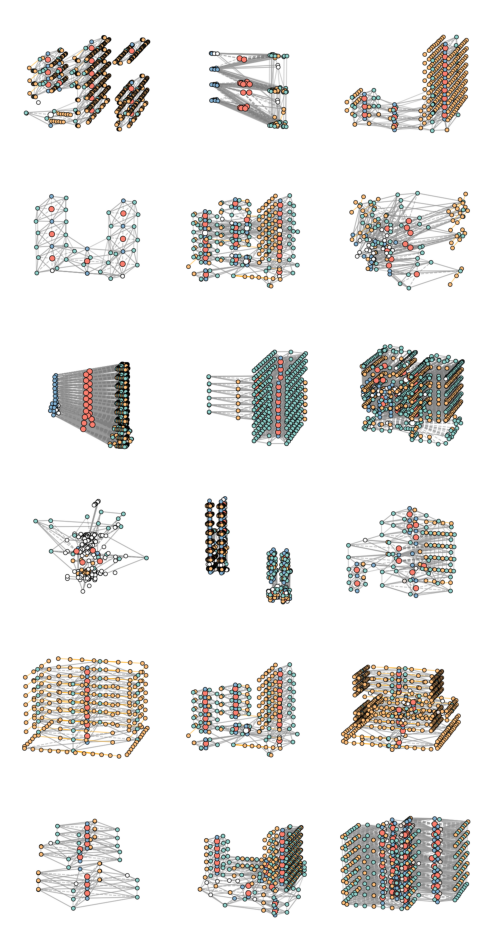

In [29]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# 设置文件夹路径
folder1 = "E:/DATA/Moosasbuildingdatasets/figure/original"
folder2 = "E:/DATA/Moosasbuildingdatasets/figure/convex"
folder3 = "E:/DATA/Moosasbuildingdatasets/figure/graph"

# 获取所有文件并找出公共部分
files1 = set(os.listdir(folder1))
files2 = set(os.listdir(folder2))
files3 = set(os.listdir(folder3))
common_files = list(files1 & files2 & files3)

# 随机选择 18 张图片
random.seed(12)
selected_files = random.sample(common_files, min(18, len(common_files)))

# 处理图片
cropped_images = []
for file in selected_files:
    img_path = os.path.join(folder3, file)
    img = Image.open(img_path)

    # 获取原始尺寸
    w, h = img.size
    side_length = int(min(w, h) * 0.6)  # 确保裁剪为正方形

    left = (w - side_length) // 2
    top = (h - side_length) // 2
    right = left + side_length
    bottom = top + side_length

    # 裁剪成正方形
    cropped_img = img.crop((left, top, right, bottom))
    cropped_images.append(cropped_img)

# 统一图片尺寸
img_size = (500, 500)  # 设定为正方形
cropped_images = [img.resize(img_size) for img in cropped_images]

# 创建 3x6 的画布
fig, axes = plt.subplots(6, 3, figsize=(6, 12))  # 控制整体尺寸

# 设置子图间距
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for ax, img in zip(axes.flat, cropped_images):
    ax.set_facecolor("lightgray")  # 设定灰色背景框
    ax.imshow(img)
    ax.set_xticks([])  # 移除刻度
    ax.set_yticks([])  # 移除刻度
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.show()


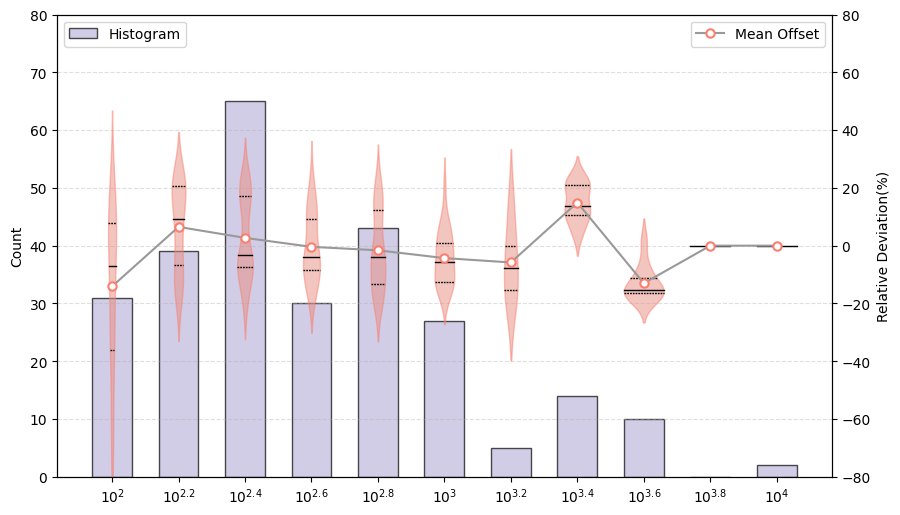

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist_violin(data):
    # 定义区间边界（10^1 到 10^5）
    bins = [0, 10**2.1, 10**2.3, 10**2.5, 10**2.7, 10**2.9, 10**3.1, 10**3.3, 10**3.5, 10**3.7, 10**3.9, 10**5]
    
    bin_labels = ["$10^{2}$", "$10^{2.2}$", "$10^{2.4}$", "$10^{2.6}$", "$10^{2.8}$", "$10^{3}$", 
                  "$10^{3.2}$", "$10^{3.4}$", "$10^{3.6}$", "$10^{3.8}$", "$10^{4}$"]
    
    # 计算每个区间的计数
    hist_counts, _ = np.histogram(data, bins=bins)
    
    # 计算每个区间的数据分布
    binned_data = [data[(data >= bins[i]) & (data < bins[i+1])] for i in range(len(bins)-1)]
    
    # 计算相对偏移量（相对于区间上下限的几何平均）
    geom_means = [10**2, 10**2.2, 10**2.4, 10**2.6, 10**2.8, 10**3, 10**3.2, 10**3.4, 10**3.6, 10**3.8, 10**4.5]
    mean_offsets = []
    mean_offsets = []
    violin_data = []
    positions = []
    
    for i, bin_data in enumerate(binned_data):
        if len(bin_data) > 2 and not np.all(np.isnan(bin_data)):
            rel_dev = 100*(bin_data - geom_means[i]) / geom_means[i]
            violin_data.extend(rel_dev)
            positions.extend([i] * len(rel_dev))
            offset = np.mean(rel_dev)
        else:
            offset = 0
            positions.append(i)
            violin_data.append(offset)
        mean_offsets.append(offset)
    
    # 创建DataFrame用于violinplot
    df_violin = pd.DataFrame({
        'position': positions,
        'deviation': violin_data
    })
    
    # 创建画布
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()
    
    # 直方图
    ax1.bar(range(len(bins)-1), hist_counts, color=colors['purple'], alpha=0.7, width=0.6, edgecolor='black', label='Histogram')
    ax1.set_ylabel("Count")

    ax1.set_xticks(range(len(bins)-1))
    ax1.set_xticklabels(bin_labels, rotation=0)
    ax1.set_ylim(0, 80)
    
    # 小提琴图
    if len(df_violin) > 0:  # 确保有数据再画图
        violin = sns.violinplot(data=df_violin, x='position', y='deviation', ax=ax2,
            inner='quartile',  # 显示四分位数统计
            width=0.6, 
            color=colors['red'], 
            edgecolor=colors['red'],
            alpha=0.5,
            linewidth=1)   
        for line in violin.lines:
            line.set_color('black')  # 设置四分位数线和中位数线的颜色
            line.set_linewidth(1)    # 设置线宽
        
        # 设置中位数点的样式
        for l in violin.lines[1::3]:
            l.set_linewidth(1)       # 加粗中位数线
            l.set_linestyle('-')
    ax2.set_ylabel("Relative Deviation(%)")
    ax2.set_ylim(-80, 80)
    
    # 连接平均值
    valid_indices = ~np.isnan(mean_offsets)
    ax2.plot(np.arange(len(bins)-1)[valid_indices], 
             np.array(mean_offsets)[valid_indices], 
             marker='o',           # 圆形标记
             mfc='white',         # 标记填充颜色为白色（空心）
             mec=colors['red'],  # 标记边缘颜色
             ms=6,               # 标记大小
             mew=1.5,            # 标记边缘宽度
             color=colors['grey'], 
             lw=1.5, 
             label='Mean Offset')
    
    # 图例
    ax1.legend(loc='upper left', frameon=True)
    
    # 为小提琴图和平均值线添加单独的图例
    handles, labels = ax2.get_legend_handles_labels()
    # 自定义图例中小提琴图的颜色和透明度
    ax2.legend(handles=handles, labels=labels, loc='upper right', frameon=True)
    ax1.grid(True, axis='y', linestyle='--', alpha=0.4)
    plt.show()

# 示例数据
# 颜色映射
colors = {
    'yellow': '#FFBE7A',
    'grey': '#999999',
    'blue': '#82B0D2',
    'green': '#8ECFC9',
    'pink': '#E7DAD2',
    'purple': '#BEB8DC',
    'red': '#FA7F6F',
    'void': 'white',
    None: 'white'
}

# 读取Excel数据
file_path = "E:/DATA/Moosasbuildingdatasets/STAT.xlsx"
df = pd.read_excel(file_path, sheet_name='GEO', usecols=["F0"])
data = df["F0"]

plot_hist_violin(data)

In [217]:
import os
import json
import numpy as np
import networkx as nx
import pandas as pd
from pathlib import Path

from graphIO import json_to_graph

def analyze_graph_properties(G):
    """计算图的性质"""
    properties = {}
    properties["num_nodes"] = G.number_of_nodes()
    properties["num_edges"] = G.number_of_edges()
    
    # 计算平均度
    degrees = [deg for _, deg in G.degree()]
    properties["avg_degree"] = np.mean(degrees) if degrees else 0
    
    # 计算连通性
    if nx.is_connected(G):
        properties["num_components"] = 1
        properties["largest_component_size"] = properties["num_nodes"]
        properties["diameter"] = nx.diameter(G)  # 仅适用于连通图
    else:
        components = list(nx.connected_components(G))
        properties["num_components"] = len(components)
        properties["largest_component_size"] = max(len(comp) for comp in components)
        properties["diameter"] = None  # 不计算直径
    
    # 计算中心性
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
    properties["avg_degree_centrality"] = np.mean(list(degree_centrality.values())) if degree_centrality else 0
    properties["avg_betweenness_centrality"] = np.mean(list(betweenness_centrality.values())) if betweenness_centrality else 0
    
    # 计算图密度
    properties["density"] = nx.density(G)
    
    # 计算聚类系数
    properties["avg_clustering"] = nx.average_clustering(G)
    
    return properties

def batch_process_graphs(root_dir, output_csv):
    """批量处理多个子文件夹中的图，并保存为CSV"""
    results = []
    
    for subdir in os.listdir(root_dir):
        subdir_path = os.path.join(root_dir, subdir)
        if os.path.isdir(subdir_path):
            try:
                G = json_to_graph(subdir_path)
                graph_properties = analyze_graph_properties(G)
                graph_properties["graph_name"] = subdir  # 以子文件夹名作为图的名称
                results.append(graph_properties)
            except Exception as e:
                print(f"处理 {subdir} 时出错: {e}")

    # 保存为CSV
    df = pd.DataFrame(results)
    df.to_csv(output_csv, index=False)

# 示例调用
batch_process_graphs("E:/DATA/Moosasbuildingdatasets/graph", "graph_properties.csv")


(221, 1)


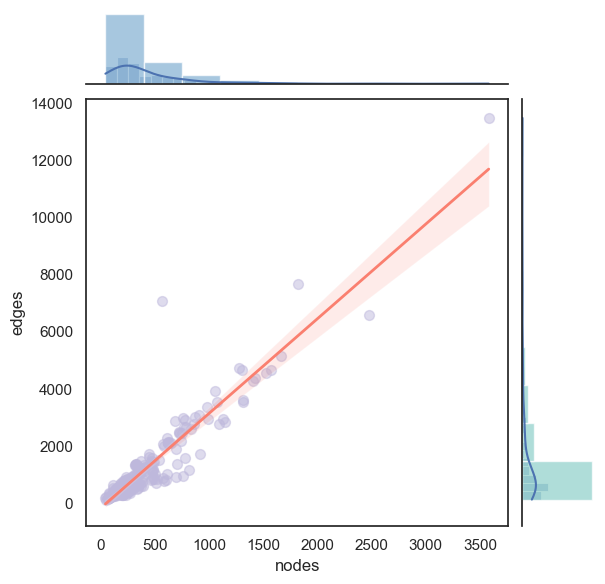

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

colors = {
    'yellow': '#FFBE7A',
    'grey': '#999999',
    'blue': '#82B0D2',
    'green': '#8ECFC9',
    'pink': '#E7DAD2',
    'purple': '#BEB8DC',
    'red': '#FA7F6F',
    'void': 'white',
    None: 'white'
}

# 读取 CSV
df = pd.read_csv("E:/DATA/Moosasbuildingdatasets/graph_properties.csv")

# 先转换为 numpy 数组再进行索引操作
nodes = df["num_nodes"].to_numpy()[:, np.newaxis]
print(np.shape(nodes))

edges = df["num_edges"].to_numpy()[:, np.newaxis]
data = np.hstack([nodes, edges])

df_plot = pd.DataFrame(data, columns=["nodes", "edges"])
df_plot = df_plot[df_plot['nodes'] <= 10000]  # 只显示节点数不超过1000的数据
df_plot = df_plot[df_plot['edges'] <= 20000] # 只显示边数不超过2000的数据
# 绘制更丰富的联合分布图
g = sns.jointplot(
    data=df_plot, 
    x="nodes", 
    y="edges",
    # 设置散点图样式
    kind='reg',  # 包含回归线的散点图
    scatter_kws={
        'color': colors['purple'],  # 散点颜色
        'alpha': 0.5,  # 透明度
        's': 50  # 点的大小
    },
    # 设置回归线样式
    line_kws={
        'color': colors['red'],  # 回归线颜色
        'lw': 2  # 线宽
    }
)

# 设置边缘分布图的颜色
g.ax_marg_x.hist(df_plot['nodes'], color=colors['blue'], alpha=0.7)
g.ax_marg_y.hist(df_plot['edges'], color=colors['green'], alpha=0.7, orientation='horizontal')

# 添加边框
g.ax_joint.spines['top'].set_visible(True)
g.ax_joint.spines['right'].set_visible(True)



plt.show()